<a href="https://colab.research.google.com/github/QuaziSamiha/Digital_Image_Processing/blob/main/1703155_DIP_Lab_4_(29_October%2C_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

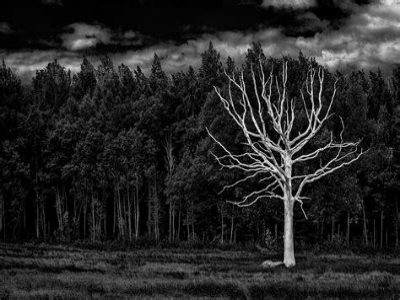

In [ ]:
# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/nature2.jpg')
# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/globe.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/th.JPEG')
resized_img = cv2.resize(img, (400,300))
cv2_imshow(resized_img)

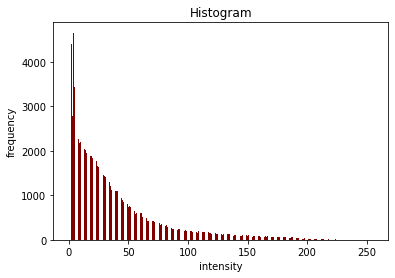

In [ ]:
grayImg = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
# (n, m) = (grayImg.shape)

k=0
H = np.zeros((256), dtype=int)
while k < 256:
    H[k]=np.count_nonzero(grayImg==k)
    # H[k]=np.count_nonzero(resized_img==k)
    k=k+1

intensity = np.arange(0, 256, 1)

# print(intensity)
# print(H)
plt.bar(intensity, H, color='maroon', width=0.5)
plt.xlabel('intensity')
plt.ylabel('frequency')
plt.title('Histogram')
plt.show()

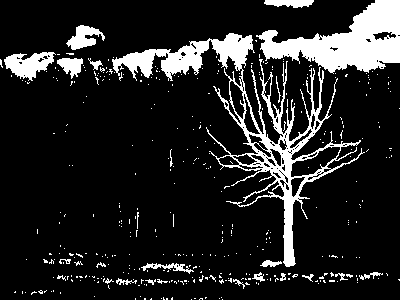

In [ ]:
# segmentation using threshold
def threshold(im, th):
  height = len(im)
  width = len(im[0])
  for i in range(height):
    for j in range(width):
      if(im[i,j] > th):
        im[i,j] = 255
      else:
        im[i,j] = 0
  return im

cv2_imshow(threshold(grayImg, 75))


Found automatic threshold t = 0.39175591440525376.


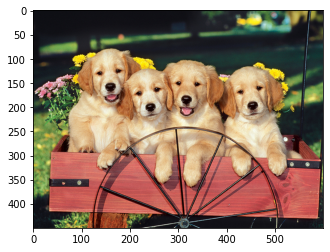

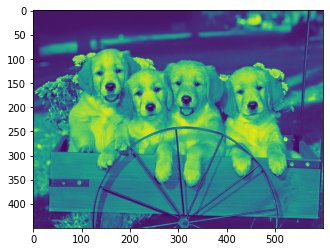

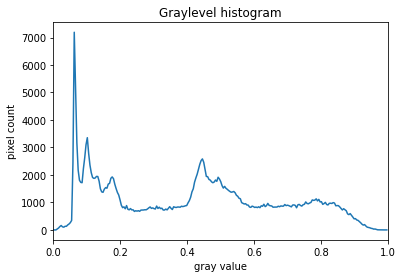

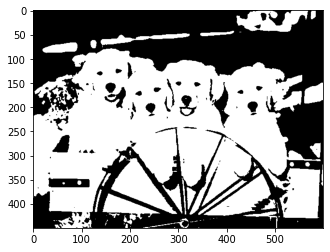

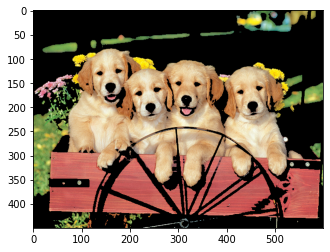

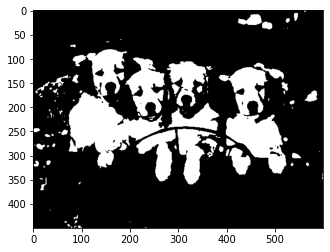

In [ ]:
# -*- coding: utf-8 -*-
"""DIP_LAB03.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1HFbEk8J_FKqS8aHW9WZxlW0ZqUZrXbwJ
"""

import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

img = skimage.io.imread(fname="/content/drive/MyDrive/Colab Notebooks/images/dog.jpg")
fig, axis = plt.subplots()
plt.imshow(img)

# convert the image to grayscale
grayImage = skimage.color.rgb2gray(img)
fig, axis = plt.subplots()
plt.imshow(grayImage)
# blur the image to denoise
blurred_image = skimage.filters.gaussian(grayImage, sigma=1.0)

# show the histogram of the blurred image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)

# perform automatic thresholding
t = skimage.filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))

# create a binary mask with the threshold found by Otsu's method
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

# apply the binary mask to select the foreground
selection = img.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

# create a binary mask with the threshold taking t
t = 0.65
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

odd=[]
even=[]